In [6]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from pandas import read_csv
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from keras.callbacks import History 

In [7]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train=x_train.reshape(60000, 784)
x_test=x_test.reshape(10000, 784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/ 255.0
x_test=x_test / 255.0


In [13]:
Y_train= to_categorical(y_train, 10)
Y_test= to_categorical(y_test, 10)
model=keras.Sequential()

model.add(Dense(512, input_shape=(784,), activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(10, activation='softmax'))



model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]

)
history = model.fit(
    x_train, Y_train,
    batch_size=128,
    epochs=20,
    verbose=2, validation_data=(x_test, Y_test)

)
print(history.history.keys())

Epoch 1/20
469/469 - 14s - loss: 0.2577 - accuracy: 0.9214 - val_loss: 0.1195 - val_accuracy: 0.9628
Epoch 2/20
469/469 - 13s - loss: 0.1107 - accuracy: 0.9669 - val_loss: 0.0953 - val_accuracy: 0.9707
Epoch 3/20
469/469 - 13s - loss: 0.0807 - accuracy: 0.9757 - val_loss: 0.0827 - val_accuracy: 0.9741
Epoch 4/20
469/469 - 13s - loss: 0.0645 - accuracy: 0.9796 - val_loss: 0.0726 - val_accuracy: 0.9788
Epoch 5/20
469/469 - 13s - loss: 0.0548 - accuracy: 0.9823 - val_loss: 0.0647 - val_accuracy: 0.9809
Epoch 6/20
469/469 - 13s - loss: 0.0473 - accuracy: 0.9851 - val_loss: 0.0698 - val_accuracy: 0.9804
Epoch 7/20
469/469 - 13s - loss: 0.0420 - accuracy: 0.9865 - val_loss: 0.0698 - val_accuracy: 0.9793
Epoch 8/20
469/469 - 13s - loss: 0.0368 - accuracy: 0.9882 - val_loss: 0.0823 - val_accuracy: 0.9781
Epoch 9/20
469/469 - 13s - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.0593 - val_accuracy: 0.9817
Epoch 10/20
469/469 - 13s - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.0933 - val_accura

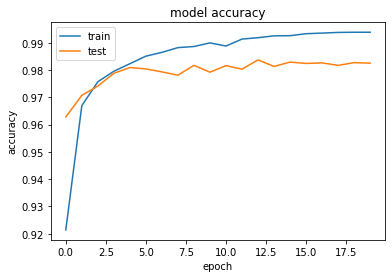

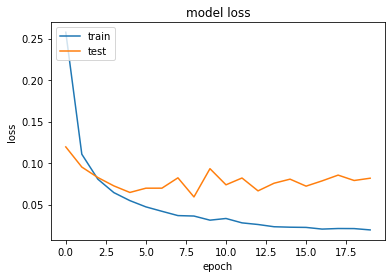

In [14]:


plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()